In [1]:
import numpy as np
import matplotlib.pyplot as plt

### A test particle moves in a gravitational field (Newtonian)

In [2]:
# functions
def calc(arr):
    '''input:(x,y,vx,vy), return:(vx,vy,ax,ay)'''
    Sx = Sy = 0
    for i in range(len(M)):
        Sx += M[i][1]*(M[i][0][0]-arr[0])/((M[i][0][0]-arr[0])**2+(M[i][0][1]-arr[1])**2)**1.5
        Sy += M[i][1]*(M[i][0][1]-arr[1])/((M[i][0][0]-arr[0])**2+(M[i][0][1]-arr[1])**2)**1.5
    return arr[2],arr[3],Sx,Sy

def iterate(pos,v,step):
    '''calculate (x,y)_{k+1} from (x,y)_k and (vx,xy)_k using Runge-Kutta method'''
    y = np.array([pos[0],pos[1],v[0],v[1]])
    k1 = np.array(calc(y))
    k2 = np.array(calc(y + step/2*k1))
    k3 = np.array(calc(y + step/2*k2))
    k4 = np.array(calc(y + step*k3))
    y1 = y + step/6*(k1+2*k2+2*k3+k4)
    return y1

def main(x0=5,y0=0,vx0=0,vy0=2,step=0.01,time=1000):
    pos = [(x0,y0)]
    vxy = [(vx0,vy0)]
    for k in range(int(time/step)):
        pos.append(iterate(pos[k],vxy[k],step)[0:2])
        vxy.append(iterate(pos[k],vxy[k],step)[2:4])
    
    pos = np.array(pos)
    vxy = np.array(vxy)
    
    plt.figure(1,figsize=(12,6))
    plt.rcParams["font.size"] = 14
    # trajectory
    plt.subplot(1,3,(1,2))
    plt.scatter(pos[:,0],pos[:,1],c=vxy[:,0]**2+vxy[:,1]**2,s=1,cmap="jet")
    #plt.plot(pos[:,0],pos[:,1]) # faster but without color
    cbar = plt.colorbar()
    cbar.ax.set_title('v')
    plt.title("(x,y) plane")
    plt.xlim(-5,5);plt.ylim(-5,5)
    plt.scatter(x0,y0,c='k',marker='*',s=10)
    for i in range(len(M)):
        plt.scatter(M[i][0][0],M[i][0][1],c='r',s=abs(M[i][1])*5)
    # angular momentum
    plt.subplot(1,3,3)
    plt.plot(np.linspace(0,time,int(time/step+1)),pos[:,1]*vxy[:,0]-pos[:,0]*vxy[:,1])
    #plt.axhline(0,c='k')
    plt.title("$L_z(t)$")

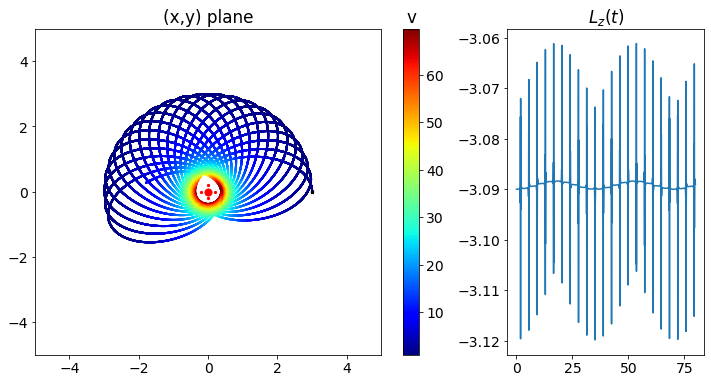

In [89]:
# massive particles that produce the gravitational field
# format: [(x,y),mass]
M = [[(0,0),10],
    [(0.2,0),1],
    [(-0.2,0),1],
    [(0,0.2),1],
    [(0,-0.2),1]]

main(x0=3,y0=0,vx0=0,vy0=1.03,
     step=0.001,time=80)

### above: Precession caused by the quadrupole moment of mass distribution